In [1]:
import cv2
import numpy as np

## Setting up camera

In [2]:
# def nothing(x):
#     pass

# cv2.namedWindow("Window")
# cv2.createTrackbar("Param Name", "Window", 0, 10, nothing)

In [3]:
def try_camera(func):
    cap = cv2.VideoCapture(0)

    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Our operations on the frame come here
        try:
            gray = func(frame) # cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Display the resulting frame
            cv2.imshow('frame', gray)
        except:
            print("Nothing found...")
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()
    
# try_camera(lambda x : x)

## Part 1: Extracting Hand from Feed

In [4]:
# ! {"pip install matplotlib"}

In [5]:
frame = np.load('open_palm.npy')

In [6]:
import matplotlib.pyplot as plt

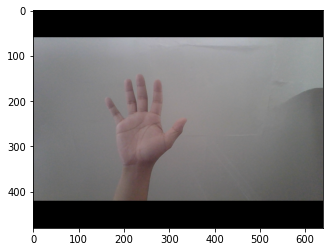

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [8]:
frame.shape

(480, 640, 3)

In [9]:
def get_skinmask(frame):
    lower_HSV = np.array([0, 70, 0], dtype = "uint8")  
    upper_HSV = np.array([25, 255, 255], dtype = "uint8")  

    convertedHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)  
    skinMaskHSV = cv2.inRange(convertedHSV, lower_HSV, upper_HSV)  


    lower_YCrCb = np.array((0, 138, 67), dtype = "uint8")  
    upper_YCrCb = np.array((255, 173, 133), dtype = "uint8")  

    convertedYCrCb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)  
    skinMaskYCrCb = cv2.inRange(convertedYCrCb, lower_YCrCb, upper_YCrCb)  

    skinMask = cv2.add(skinMaskHSV,skinMaskYCrCb)  
    return skinMask

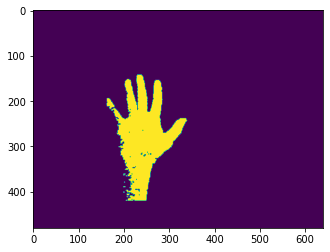

In [10]:
plt.imshow(get_skinmask(frame))

Testing Code

In [11]:
try_camera(get_skinmask)

In [11]:
def morph_and_blur(frame, skinMask):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))  
    skinMask = cv2.erode(skinMask, kernel, iterations = 1)  
    skinMask = cv2.dilate(skinMask, kernel, iterations = 1)  

    # blur the mask to help remove noise, then apply the  
    # mask to the frame  
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0) 
    skin = cv2.bitwise_and(frame, frame, mask = skinMask) 
    return skin

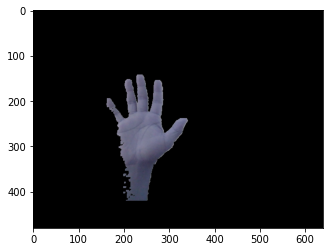

In [12]:
plt.imshow(morph_and_blur(frame, get_skinmask(frame)))

In [13]:
isolate = lambda x : morph_and_blur(x, get_skinmask(x))
try_camera(isolate)

## Part 2: Connected Components for Gesture Recognition

In [14]:
ok_hand = np.load('ok.npy')

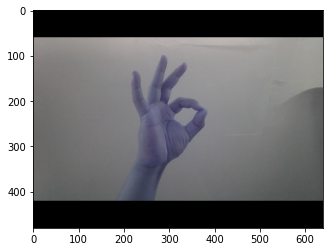

In [15]:
plt.imshow(ok_hand)

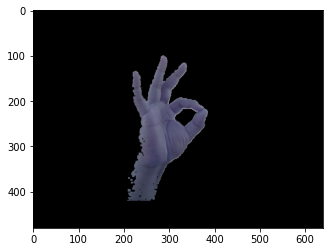

In [16]:
plt.imshow(isolate(ok_hand).astype(np.uint8))

In [17]:
def gray_thresh(frame):
    max_binary_value = 10
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)  
    ret, thresh = cv2.threshold(gray, 0, max_binary_value, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
    return thresh # thresh if ret else None

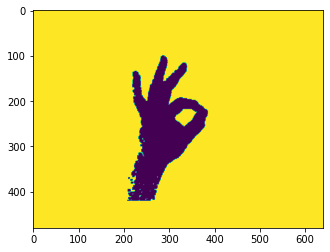

In [18]:
plt.imshow(gray_thresh(isolate(ok_hand)))

In [19]:
def arr2img(arr):
    arr = np.uint8(arr / np.max(arr) * 255)
    return cv2.merge([arr, arr, arr])

In [20]:
# try_camera(lambda x : arr2img(gray_thresh(isolate(x))))

In [21]:
def get_connect(img):
    ret, markers, stats, centroids = cv2.connectedComponentsWithStats(img, ltype=cv2.CV_16U)  
    markers = np.array(markers, dtype=np.uint8)  
    return arr2img(markers)

In [22]:
marks = get_connect(gray_thresh(isolate(ok_hand)))

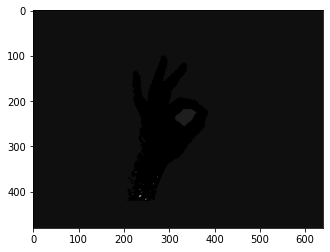

In [23]:
plt.imshow(marks)

Test out code so far...

In [24]:
render_comps = lambda x : get_connect(gray_thresh(isolate(x)))
# try_camera(render_comps)

In [25]:
def get_connect2(img):
    ret, markers, stats, centroids = cv2.connectedComponentsWithStats(img, ltype=cv2.CV_16U)  
    markers = np.array(markers, dtype=np.uint8)  
    labeled_img = arr2img(markers)
    
    # sort by area of ROI
    statsSortedByArea = stats[np.argsort(stats[:, 4])]  
    roi = statsSortedByArea[-3][0:4]  
    x, y, w, h = roi  
    subImg = labeled_img[y:y+h, x:x+w]
    subImg = cv2.cvtColor(subImg, cv2.COLOR_BGR2GRAY)
    
    _, contours, _ = cv2.findContours(subImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
    maxCntLength = 0  
    for i in range(0,len(contours)):  
        cntLength = len(contours[i])  
        if(cntLength>maxCntLength):  
            cnt = contours[i]  
            maxCntLength = cntLength  
    if(maxCntLength>=5):  
        ellipseParam = cv2.fitEllipse(cnt)
        (x,y), (MA, ma), angle = ellipseParam
        print(f"(x={x}, y={y}), (MA={MA}, ma={ma}), Angle={angle}")
        subImg = cv2.cvtColor(subImg, cv2.COLOR_GRAY2RGB);  
        subImg = cv2.ellipse(subImg,ellipseParam,(0,255,0),2)  

    subImg = cv2.resize(subImg, (0,0), fx=3, fy=3)
    return subImg

In [26]:
render_comps2 = lambda x : get_connect2(gray_thresh(isolate(x)))
try_camera(render_comps2)

Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
Nothing found...
(x=0.6840699911117554, y=2.3783769607543945), (MA=4.724111557006836, ma=5.970038414001465), Angle=84.96195983886719
(x=33.04287338256836, y=24.597991943359375), (MA=35.66769027709961, 

## Part 3: Tracking 2D Finger Positions

In [27]:
def get_gray_thresh(x):
    img = arr2img(1 * (gray_thresh(isolate(x)) == 0))
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

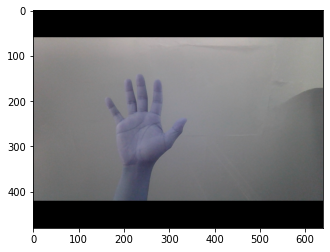

In [28]:
plt.imshow(np.load('open_palm.npy'))

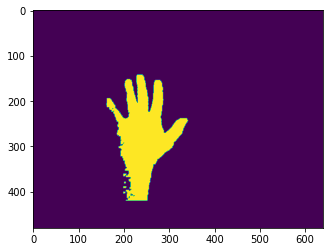

In [29]:
plt.imshow(get_gray_thresh(np.load('open_palm.npy')))

In [30]:
def get_hull(thresholdedHandImage):
    _, contours, _ = cv2.findContours(thresholdedHandImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    thresholdedHandImage = cv2.cvtColor(thresholdedHandImage, cv2.COLOR_GRAY2BGR)
    contours = sorted(contours,key=cv2.contourArea,reverse=True)
    fingerCount = 0
    fingerPts = []
    if len(contours)>1:  
        largestContour = contours[0]  
        hull = cv2.convexHull(largestContour, returnPoints = False)     
        for cnt in contours[:1]:  
            defects = cv2.convexityDefects(cnt,hull)  
            if(not isinstance(defects,type(None))):  
                for i in range(defects.shape[0]):  
                    s,e,f,d = defects[i,0]  
                    start = tuple(cnt[s][0])  
                    end = tuple(cnt[e][0])  
                    far = tuple(cnt[f][0])
                    
                    # finger detection
                    c_squared = (end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2  
                    a_squared = (far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2  
                    b_squared = (end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2  
                    angle = np.arccos((a_squared + b_squared  - c_squared ) / (2 * np.sqrt(a_squared * b_squared ))) 
                    
                    if angle <= np.pi / 3:
                        fingerCount += 1 
                        cv2.circle(thresholdedHandImage,far,5,[0,0,255],-1)
                        fingerPts.append(far)
                    cv2.line(thresholdedHandImage,start,end,[0,255,0],2)
                
        print(fingerCount)
        
    return thresholdedHandImage

In [31]:
get_conv_img = lambda x : get_hull(get_gray_thresh(x))

3


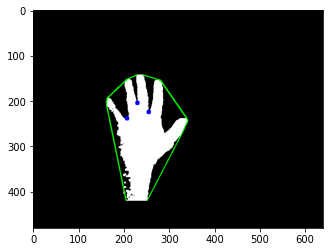

In [32]:
plt.imshow(get_conv_img(np.load('open_palm.npy')))

In [33]:
try_camera(get_conv_img)

c:\users\fcrey\anaconda3\envs\hw4env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


0
2
3
4
3
3
2
2
4
2
1
2
2
2
1
0
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
3
3
1
1


c:\users\fcrey\anaconda3\envs\hw4env\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in int_scalars
c:\users\fcrey\anaconda3\envs\hw4env\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
3
1
1
1
1
1
1
1
1
1
1
1
3
3
3
3
3
3
3
3
3
3
5
4
4
3
3
2
0


## Part 4: Control Mouse and Keyboard

Simple Gestures:
1. Finger Count:
    - 2 = open file
    - 3 = save file
    
2. Pinch - Draw/Click

3. Momentum Center - Mouse Cursor Location

Complex Gestures:
    
Implemented:

5. Closed + Center Circle Radius > 120 == Ctrl + Z

6. Pinch Axis Angle - Rotation

7. Open + Close + Open == Next Song / Hue 1

8. Open + Move Away Hand + Open == Prev Song / Hue 2

In [36]:
import pyautogui

In [75]:
import pyautogui
def brush_menu():
    pyautogui.press([
        'alt', 'h', 'b'
    ]) 

def move_mouse(x, y, cap_w, cap_h):
    scaleX = 1920 / cap_w
    scaleY = 1080 / cap_h
    offsetX = 0
    offsetY = 0
    
    cX = offsetX + scaleX * x   
    cY = offsetY + scaleY * y 
    pyautogui.moveTo(cX, cY, duration=0.02, tween=pyautogui.easeInOutQuad) 
    
def click():
    pyautogui.click(button='left')

In [76]:
from scipy.stats import mode

In [77]:
def paint_conv_on_frame(thresholdedHandImage, regular_img, centers, open_closes, finger_counts, cdists, cap, state):
    _, contours, _ = cv2.findContours(thresholdedHandImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText  = (10,30)
    bottomLeftCornerOfText2 = (10,60)
    fontScale              = 1
    fontColor              = (255,255,255)
    lineType               = 2
    
    thresholdedHandImage = regular_img
    contours = sorted(contours,key=cv2.contourArea,reverse=True)
    fingerCount = 0
    fingerPts = []
    startEndPts = []
    if len(contours)>1:  
        largestContour = contours[0]  
        hull = cv2.convexHull(largestContour, returnPoints = False)     
        for cnt in contours[:1]:  
            defects = cv2.convexityDefects(cnt,hull)  
            if(not isinstance(defects,type(None))):  
                for i in range(defects.shape[0]):  
                    s,e,f,d = defects[i,0]  
                    start = tuple(cnt[s][0])  
                    end = tuple(cnt[e][0])  
                    far = tuple(cnt[f][0])
                    
                    # finger detection
                    c_squared = (end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2  
                    a_squared = (far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2  
                    b_squared = (end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2  
                    angle = np.arccos((a_squared + b_squared  - c_squared ) / (2 * np.sqrt(a_squared * b_squared ))) 
                    
                    if angle <= np.pi / 3:
                        fingerCount += 1 
                        cv2.circle(thresholdedHandImage,far,5,[0,0,255],-1)
                        fingerPts.append([far[i] for i in range(len(far))])
                    
                    cv2.line(thresholdedHandImage,start,end,[0,255,0],2)
                    startEndPts.append([start[i] for i in range(len(start))])   
                    
        # Hand Tracking
        if len(startEndPts) > 5:
            M = cv2.moments(largestContour)  
            cX = 0 + 1 * int(M["m10"] / M["m00"])  
            cY = 0 + int(0.9 * M["m01"] / M["m00"])
            centers.append(np.array([cX, cY]))
            centers_mat = np.vstack(centers)
            center = np.mean(centers_mat, axis=0).astype(np.int)
            
            move_mouse(center[0], center[1], cap.get(3), cap.get(4))

            font                   = cv2.FONT_HERSHEY_SIMPLEX
            bottomLeftCornerOfText = (10,30)
            fontScale              = 1
            fontColor              = (255,255,255)
            lineType               = 2
            cv2.circle(thresholdedHandImage, (center[0], center[1]), 5, [0,255,255], -1)
        
        # Draw Circle from Moment Center
        if len(startEndPts) > 5:
            pts = np.array(startEndPts)
            min_pts = np.array([cX, np.amin(pts, axis=0)[1]])
            dist = np.linalg.norm(min_pts - center, 2)
            thresholdedHandImage = cv2.circle(
                thresholdedHandImage, (center[0], center[1]), 60, [0,255,255], 2)
            thresholdedHandImage = cv2.circle(
                thresholdedHandImage, (center[0], center[1]), 120, [0,255,255], 2)
            thresholdedHandImage = cv2.circle(
                thresholdedHandImage, (center[0], center[1]), int(dist), [0,255,0], 2)
            cdists.append(dist)
        
        # Open Palm Detection
        if len(fingerPts) > 0 and len(startEndPts) > 5:
            pts = np.array(fingerPts)
            mean_pts = np.mean(pts, axis=0)
            min_pts = np.amin(pts, axis=0)
            dist = np.linalg.norm(min_pts - center, 2)

            open_closes.append(1)
            finger_counts.append(len(fingerPts))
            mean_finger_count = int(np.mean(finger_counts))
            
            state['num_fingers'] = mean_finger_count
            
            if mean_finger_count == 4:
                cv2.putText(thresholdedHandImage, f"Save: {mean_finger_count}", 
                        bottomLeftCornerOfText2, 
                        font, fontScale, fontColor, lineType)
            else:
                cv2.putText(thresholdedHandImage, f"Num Fingers: {mean_finger_count}", 
                            bottomLeftCornerOfText2, 
                            font, fontScale, fontColor, lineType)
        elif len(startEndPts) > 5:
            open_closes.append(0)
        else:
            open_closes.append(-1)
    else:
        open_closes.append(-1)
        
    if np.mean(open_closes) >= 0.33:
        cv2.putText(thresholdedHandImage, "Open", 
                        bottomLeftCornerOfText, 
                        font, fontScale, fontColor, lineType)
        state['open'] = True
        state['closed'] = False
    elif np.mean(open_closes) < 0.33 and np.mean(open_closes) >= -0.33:
        if cdists[0] < 120 and cdists[-1] > 120:
            cv2.putText(thresholdedHandImage, "Closed and Erased", 
                        bottomLeftCornerOfText, 
                        font, fontScale, fontColor, lineType)
        else:
            cv2.putText(thresholdedHandImage, "Closed", 
                bottomLeftCornerOfText, 
                font, fontScale, fontColor, lineType)
            state['open'] = False
            state['closed'] = True
    else:
        cv2.putText(thresholdedHandImage, "No Hand Detected", 
                        bottomLeftCornerOfText, 
                        font, fontScale, fontColor, lineType)
        state['open'] = False
        state['closed'] = False
            
    return thresholdedHandImage, centers, open_closes

def draw_center_of_ellipse(img, disp, center, pinches, angles, diff_angles):
    img = gray_thresh(isolate(img))
    try:
        ret, markers, stats, centroids = cv2.connectedComponentsWithStats(img, ltype=cv2.CV_16U)  
        markers = np.array(markers, dtype=np.uint8)  
        labeled_img = arr2img(markers)

        # sort by area of ROI
        statsSortedByArea = stats[np.argsort(stats[:, 4])]  
        roi = statsSortedByArea[-3][0:4]  
        x, y, w, h = roi
        
        subImg = labeled_img[y:y+h, x:x+w]
        subImg = cv2.cvtColor(subImg, cv2.COLOR_BGR2GRAY)

        _, contours, _ = cv2.findContours(subImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
        maxCntLength = 0  
        for i in range(0,len(contours)):  
            cntLength = len(contours[i])  
            if(cntLength>maxCntLength):  
                cnt = contours[i]  
                maxCntLength = cntLength  
        if(maxCntLength>=5):  
            ellipseParam = cv2.fitEllipse(cnt)
            (x_sub, y_sub), (MA, ma), angle = ellipseParam
            
            # Checking Location
            check_center1 = x > center[0]
            check_center2 = x + w > center[0]
            check_center3 = y < center[1]
            check_center4 = y + h < center[1]
            print(w * h)
            
            check_center = check_center2 and (check_center3 or check_center4)
            
            if check_center and (w * h > 1300 and w * h < 3000):
                # Draw Ellipse Location
                cv2.circle(disp, (x, y), 5, [100 if check_center1 else 255, 10, 0], 2)
                cv2.line(disp, (x, y), (x + w, y),[100, 10, 0],2)
                
                cv2.circle(disp, (x + w, y), 5, [100 if check_center2 else 255, 10, 0], 2)
                cv2.line(disp, (x + w, y), (x + w, y + h),[100, 10, 0],2)
                
                cv2.circle(disp, (x + h, y + h), 5, [100 if check_center3 else 255, 10, 0], 2)
                cv2.line(disp, (x + w, y + h), (x, y + h),[100, 10, 0],2)
                
                cv2.circle(disp, (x, y + h), 5, [100 if check_center4 else 255, 10, 0], 2)
                cv2.line(disp, (x, y + h), (x, y),[100, 10, 0],2)

                print(w * h, angle)
                pinches.append(1)
                if np.mean(pinches) > 0.8:
                    angles.append(int(angle))
                    diff_angles.append(int(angles[-1] - angles[0]))
                    return np.mean(pinches) > 0.8
                else:
                    angles.append(int(angles[-1]))
                    diff_angles.append(int(angles[-1] - angles[0]))
                    return False
            
        angles.append(int(angles[-1]))
        diff_angles.append(int(angles[-1] - angles[0]))
        pinches.append(0)
        return False
    except:
        angles.append(int(angles[-1]))
        diff_angles.append(int(angles[-1] - angles[0]))
        pinches.append(0)
        return False
    
#  -----------next song and prev song ------------------------
def open_to_close(centers_arr, open_closes_arr, dist_start, dist_end, timer):
    indexes = np.where(np.array(open_closes_arr) == -1)
    open_close_arr = np.delete(open_closes_arr, indexes)
    half_way = len(open_closes_arr) // 2
    
    if (np.mean(open_closes_arr[:half_way]) > 0.8) and (np.mean(open_closes_arr[half_way:]) < 0.2):
        timer = 45
        print("open -> close")
        dist_start.append(centers_arr[-1])
        print(dist_start, dist_end)
        return dist_start, dist_end, timer
    if (np.mean(open_closes_arr[:half_way]) < 0.2) and (np.mean(open_closes_arr[half_way:]) > 0.8):
        dist_end.append(centers_arr[-1])
        print("close -> open")
        print(dist_start, dist_end)
        return dist_start, dist_end, timer
    return dist_start, dist_end, timer
# ------------------------------------------------------------

In [82]:
cap = cv2.VideoCapture(0)
centers_arr = []
open_closes_arr = [-1]
finger_counts = []
pinches = []
cdists = []
angles = [0]
diff_angles = [0, 0]
curr_angle = 0
mean_angles = [0] * 15

#  -----------next song and prev song ------------------------
dist_start = []
dist_end = []
timer = 0
# ------------------------------------------------------------

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    state_dict = {
        'open': False, 'closed': False, 'pinch': False,
        'num_fingers': 0
    }

    # Our operations on the frame come here
    # try:
    gray = get_gray_thresh(frame)
    disp, centers_arr, open_closes_arr = paint_conv_on_frame(
        gray, frame, centers_arr, open_closes_arr, finger_counts,
        cdists, cap, state_dict
    )
    
    #  -----------next song and prev song ------------------------
    dist_start, dist_end, timer = open_to_close(centers_arr, 
        open_closes_arr, dist_start, dist_end, timer)
    timer -= 1
    if timer <= 0:
        dist_start, dist_end = [], []
        timer = 0
    if len(dist_start) >= 1 and len(dist_end) >=1:
        start_open_close = np.mean(dist_start, axis=0)
        end_open_close = np.mean(dist_end, axis=0)
        open_close = end_open_close[0]-start_open_close[0]
        if open_close > 0:
            font                   = cv2.FONT_HERSHEY_SIMPLEX
            bottomLeftCornerOfText  = (10,125)
            fontScale              = 1
            fontColor              = (255,255,255)
            lineType               = 2
            # timer = 0
            cv2.putText(disp, "Next Song", 
                            bottomLeftCornerOfText, 
                            font, fontScale, fontColor, lineType)
        else:
            font                   = cv2.FONT_HERSHEY_SIMPLEX
            bottomLeftCornerOfText  = (10,125)
            fontScale              = 1
            fontColor              = (255,255,255)
            lineType               = 2
            # timer = 0
            cv2.putText(disp, "Prev Song", 
                            bottomLeftCornerOfText, 
                            font, fontScale, fontColor, lineType)
    # ------------------------------------------------------------
    
    ellipse_found = False
    if len(centers_arr) > 1:
        centers_mat = np.vstack(centers_arr)
        ellipse_found = draw_center_of_ellipse(
            frame, disp, np.mean(centers_mat, axis=0).astype(np.int), 
            pinches, angles, diff_angles
        )
    
    if ellipse_found:
        font                   = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText  = (10, 90 + 60)
        fontScale              = 1
        fontColor              = (255,255,255)
        lineType               = 2
        cv2.putText(disp, f"Pinch. ({np.mean(angles)}, {np.mean(diff_angles)}).", 
                        bottomLeftCornerOfText, 
                        font, fontScale, fontColor, lineType)
    
    max_angle_index = np.argmax(np.array(mean_angles))
    min_angle_index = np.argmax(-1 * np.array(mean_angles))
    if angles and np.max(mean_angles) - np.min(mean_angles) > 40 and ellipse_found:
        font                   = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText3= (10, 200 + 60)
        fontScale              = 1
        fontColor              = (255,255,255)
        lineType               = 2
        cv2.putText(disp, "rotate ccw", 
                        bottomLeftCornerOfText3, 
                        font, fontScale, fontColor, lineType)
        curr_angle += 5
        
    font                    = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText  = (10,90)
    fontScale               = 1
    fontColor               = (255,255,255)
    lineType                = 2
    cv2.putText(disp, f"Curr Angle: {int(np.mean(angles))}", 
                    bottomLeftCornerOfText, 
                    font, fontScale, fontColor, lineType)
    mean_angles.append(int(np.mean(angles)))
    
    
    # Control Based on State
    if len(centers_arr) > 1:
        if state_dict['num_fingers'] == 4:
            brush_menu()
        elif ellipse_found and state_dict['open'] and not state_dict['closed']:
            centers_mat = np.vstack(centers_arr)
            center = np.mean(centers_mat, axis=0).astype(np.int)
            move_mouse(center[0], center[1], cap.get(3), cap.get(4))
            click()
        elif state_dict['open'] or state_dict['close']:
            centers_mat = np.vstack(centers_arr)
            center = np.mean(centers_mat, axis=0).astype(np.int)
            move_mouse(center[0], center[1], cap.get(3), cap.get(4))
    
        
    if len(centers_arr) > 20:
        centers_arr = centers_arr[1:]
    if len(open_closes_arr) > 15:
        open_closes_arr = open_closes_arr[1:]
    if len(finger_counts) > 15:
        finger_counts = finger_counts[1:]
    if len(pinches) > 15:
        pinches = pinches[1:]
    if len(angles) > 15:
        angles = angles[1:]
    if len(diff_angles) > 15:
        diff_angles = diff_angles[1:]
    if len(mean_angles) > 15:
        mean_angles = mean_angles[1:]
    if len(cdists) > 15:
        cdists = cdists[1:]
        
    # Display the resulting frame
    cv2.imshow('frame', disp)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

c:\users\fcrey\anaconda3\envs\hw4env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


49
49
49
49
49
49
close -> open
[] [array([371, 290])]
49
close -> open
[] [array([373, 290])]
49
close -> open
[] [array([401, 287])]
196
close -> open
[] [array([419, 285])]
49
close -> open
[] [array([431, 283])]
49
close -> open
[] [array([449, 282])]
49
180
480
91
2156
2156 46.20503234863281
2496
2496 42.38541793823242
1968
1968 48.13050842285156
1968
1968 47.03830337524414
1968
1968 50.057769775390625
2145
2145 57.6702880859375
1833
1833 52.41632080078125
1755
1755 46.475738525390625
1716
1716 46.55914306640625
1596
1596 46.0130500793457
1672
1672 50.04819869995117
1672
1672 48.5024528503418
1716
1716 47.43787384033203
1748
1748 49.84489822387695
1824
1824 51.239479064941406
1824
1824 51.677711486816406
1748
1748 48.93586349487305
1833
1833 50.6480827331543
1444
1833
1833 51.68562316894531
1596
1596 44.92533874511719
1406
1406 38.9609489440918
1406
1406 38.5428581237793
1482
1482 40.03570556640625
1482
1482 43.93052673339844
1681
1681 44.71805953979492
1763
1763 42.49808502197265

c:\users\fcrey\anaconda3\envs\hw4env\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in int_scalars
c:\users\fcrey\anaconda3\envs\hw4env\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


315
240
352
234
252
99
49
49
121
240
66
126
140
152
130
152
176
147
154
152
252
280
189
100
297
119
open -> close
[array([486, 416])] []
open -> close
[array([486, 416]), array([486, 416])] []
open -> close
[array([486, 416]), array([486, 416]), array([486, 416])] []
open -> close
[array([486, 416]), array([486, 416]), array([486, 416]), array([486, 416])] []
open -> close
[array([486, 416]), array([486, 416]), array([486, 416]), array([486, 416]), array([486, 416])] []
112
49
49
368
49
49
close -> open
[] [array([427, 272])]
close -> open
[] [array([465, 270])]
357
close -> open
[] [array([487, 270])]
98
close -> open
[] [array([508, 270])]
29256
close -> open
[] [array([514, 270])]
28886
66
49
49
360
182
364
176
270
42
49
49
49
49
49
168
49
49
49
49
49
49
90
49
221
49
49
49
40
49
49
49
1750
225
72
171
84
294
792
702
756
378
60
16
78
100
